In [53]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential 
from keras.layers import Dense, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, RepeatVector 

In [54]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('acb.csv')

In [55]:
# Xử lý dữ liệu
prices = data['Price']

In [56]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [57]:
scaled_prices

array([[0.13206988],
       [0.13068542],
       [0.13206988],
       ...,
       [0.62679829],
       [0.63605888],
       [0.64763461]])

In [58]:
#RATIO 73

In [59]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [60]:
test_data

array([[0.81293612],
       [0.80552765],
       [0.80552765],
       [0.80923188],
       [0.80923188],
       [0.80923188],
       [0.80923188],
       [0.81478823],
       [0.82775306],
       [0.82404882],
       [0.81293612],
       [0.80552765],
       [0.79256282],
       [0.79256282],
       [0.80182341],
       [0.81849247],
       [0.83145729],
       [0.83516153],
       [0.81664035],
       [0.82404882],
       [0.83886576],
       [0.84812635],
       [0.83330941],
       [0.84071788],
       [0.84627423],
       [0.83701365],
       [0.80923188],
       [0.76663317],
       [0.77589376],
       [0.76107682],
       [0.7907107 ],
       [0.72403447],
       [0.73885141],
       [0.73885141],
       [0.74255564],
       [0.80552765],
       [0.77033741],
       [0.76848529],
       [0.74255564],
       [0.7277387 ],
       [0.73514717],
       [0.76478106],
       [0.68699211],
       [0.61290741],
       [0.61661164],
       [0.67773153],
       [0.66661882],
       [0.653

In [61]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [62]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [63]:
X_train.shape

(1009, 30, 1)

In [64]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [83]:
# 8. Define CNN-GRU Model

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
model.add(GRU(64, return_sequences = False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
16/16 [==============================] - 2s 7ms/step - loss: 0.0751
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 8.5285e-04
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 6.9339e-04
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 6.6838e-04
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 6.2792e-04
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 5.7527e-04
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 5.9620e-04
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 5.3978e-04
Epoch 11/100
16/16 [==============================] - 0s 7ms/step - loss: 5.5903e-04
Epoch 12/100
16/16 [==============================] - 0s 7ms/step - loss: 5.3356e-04
E

In [76]:
data.index


RangeIndex(start=0, stop=1485, step=1)

In [77]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

13/13 [==============================] - 0s 2ms/step
[[1486]
 [1487]
 [1488]
 [1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]]
1/1 [==============================] - 0s 18ms/step
[22444.072 22249.041 22284.117 22246.047 22909.137 22757.924 22488.205
 22571.238 22854.809 23384.365 23464.91  22815.764 22567.182 22744.422
 22876.47  22357.08  22143.354 21998.494 22043.111 22216.387 22115.418
 22081.34  22447.496 22329.713 22417.201 22557.658 22548.588 22536.848
 22641.318 22451.283]


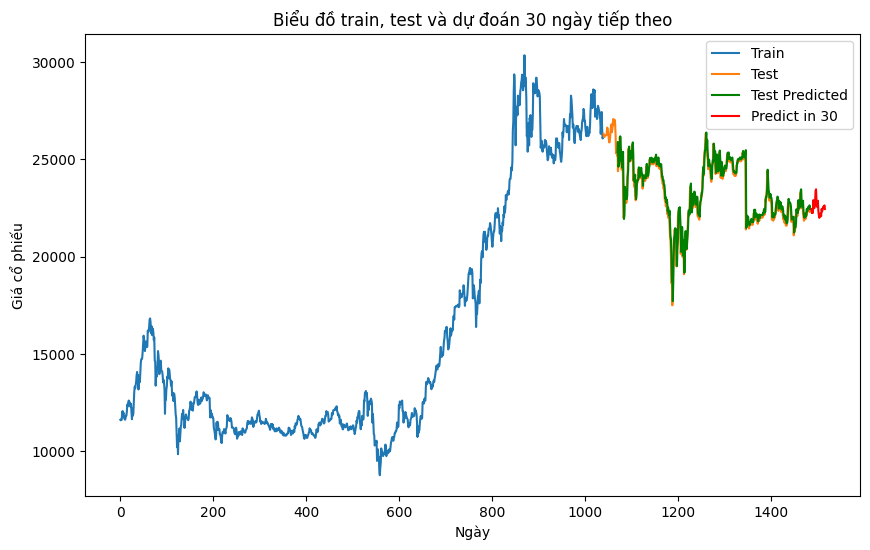

In [78]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [79]:
y_test_pred

array([[25378.998],
       [25901.395],
       [24624.408],
       [24729.96 ],
       [24908.588],
       [24933.305],
       [26188.803],
       [25595.285],
       [25353.096],
       [24927.527],
       [24589.688],
       [24760.19 ],
       [25389.729],
       [23801.342],
       [21939.111],
       [22143.537],
       [23593.117],
       [23458.566],
       [22984.646],
       [23356.215],
       [22963.525],
       [23147.998],
       [24114.92 ],
       [24441.28 ],
       [25447.654],
       [25661.506],
       [25280.102],
       [24932.86 ],
       [25392.268],
       [25429.06 ],
       [25371.195],
       [25054.39 ],
       [25725.914],
       [25877.45 ],
       [25289.117],
       [23952.795],
       [24154.254],
       [23843.096],
       [24213.63 ],
       [23330.555],
       [22959.74 ],
       [23185.502],
       [23896.479],
       [23946.928],
       [23914.523],
       [24067.723],
       [24595.23 ],
       [24360.943],
       [24096.951],
       [24164.984],


In [80]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




13/13 [==============================] - 0s 2ms/step


In [81]:
y_test1

array([[25840.],
       [24400.],
       [24720.],
       [24720.],
       [24800.],
       [26160.],
       [25400.],
       [25360.],
       [24800.],
       [24480.],
       [24640.],
       [25280.],
       [23600.],
       [22000.],
       [22080.],
       [23400.],
       [23160.],
       [22880.],
       [23240.],
       [22760.],
       [23040.],
       [24000.],
       [24280.],
       [25440.],
       [25560.],
       [25240.],
       [24880.],
       [25350.],
       [25300.],
       [25300.],
       [24950.],
       [25700.],
       [25750.],
       [25200.],
       [23900.],
       [24100.],
       [23600.],
       [24100.],
       [23100.],
       [22900.],
       [23000.],
       [23750.],
       [23750.],
       [23800.],
       [23950.],
       [24500.],
       [24200.],
       [24000.],
       [24050.],
       [24250.],
       [24450.],
       [24200.],
       [24150.],
       [24000.],
       [23500.],
       [24000.],
       [24000.],
       [24050.],
       [24000.

In [82]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.447
MAE: 329.159
RMSE: 487.865
MSLE: 0.022
-------------------
